<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet1_SHAPLEY_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJET 1 : SHAPLEY VALUES**


# Objectif : Comprendre le fonctionnement d'un modèle prédictif de crises de trouble bipolaire basé sur le Machine Learning (XGBoost)

  ✨  Dans ce tutoriel, nous apprennons à appliquer des méthodes explicables (eXplainable methods) aux modèles de machine learning pour des données tabulaires. L'objectif est de comprendre comment les modèles fonctionnent et quels sont les principaux critères utilisés pour la prise de décision. Étant donné que nous travaillons avec des données tabulaires, nous examinerons un cas d'utilisation très familier.

En particulier, nous allons nous concentrer sur un modèle d'explication spécifique appelé SHapley Additive exPlanations (SHAP) (https://arxiv.org/pdf/1705.07874.pdf). Ce modèle sera implémenté à l'aide du framework développé par Lundberg, disponible sur https://github.com/slundberg/shap.

Basé sur la théorie des jeux, SHAP considère **chaque caractéristique comme un "joueur"** dans un jeu coopératif. En résumé, SHAP quantifie la contribution que chaque caractéristique apporte à la prédiction réalisée par le modèle.

📌  Dans ce notebook, nous apprendrons comment les valeurs SHAP sont calculées mathématiquement à l'aide d'un exemple simple, puis nous nous concentrerons sur une application critique des modèles de machine learning : la prédiction des crises de trouble bipolaire.




### Valeurs de Shapley: Definition

📖 L'une des principales contributions de SHAP est de considérer l'explication comme un modèle en soi. Le modèle explicatif est une fonction linéaire d'une variable binaire :


\begin{equation}
g(z') = \phi_0 + \sum_{i=1}^{M}\phi_i z'_i
\end{equation}

où $z' \in \{0,1\}^M $, M représente le nombre de caractéristiques simplifiées, et $\phi_i \in \; \mathbb{R}$. *z'*
représente le vecteur des caractéristiques simplifiées, et , $\phi_i $ est l'attribution de la caractéristique pour la caractéristique i.

\begin{equation}
\phi_i = \sum_{S \subseteq F \ \{i\}} \frac{\mid S\mid! (\mid F\mid - \mid S\mid - 1)!}{\mid F\mid !} [f_{S \bigcup \{i\}}(x_{S \bigcup \{i\}}) - f_S(x_S)]
\end{equation}

où $f$ représente la fonction du modèle, et $S \subseteq F $, où $F$ représente l'ensemble de toutes les caractéristiques, et $S$ un sous-ensemble de $F$. Les valeurs de Shap sont une moyenne pondérée de toutes les différences possibles entre les sous-ensembles. $\mid S \mid$ représente le nombre d'éléments du sous-ensemble $S$.

La valeur de Shapley est une méthode qui satisfait quatre propriétés : **Efficacité, Symétrie, Neutralité et Additivité.**



📌  **Efficacité** fait référence au fait que la somme des contributions des caractéristiques doit être égale à la différence entre la prédiction pour une instance donnée $x$ et la moyenne des prédictions.

 📌 **Symétrie :** Cette propriété impose que les contributions des valeurs de deux caractéristiques doivent être identiques si elles contribuent de manière identique à toutes les coalitions possibles.

📌 **Additivité :** Pour les algorithmes d'ensemble utilisant le bagging (c'est-à-dire des méthodes qui consistent à entraîner différents modèles sur le jeu de données et à moyenner leurs prédictions), cela signifie que les valeurs de Shap peuvent être calculées en utilisant les valeurs de Shap individuelles de chaque modèle indépendant composant l'algorithme de bagging.

📌 **Neutralité (Dummy) :** Cette propriété garantit que la contribution d'une caractéristique qui n'a aucun effet sur la valeur prédite dans toutes les coalitions auxquelles elle est ajoutée est égale à zéro.



Pour comprendre les valeurs de Shap, leur signification et leur mode de calcul, nous allons considérer un exemple simple : imaginons que nous ayons un modèle (n'importe quel modèle de machine learning) qui calcule la probabilité de ne pas rembourser un crédit, en fonction d'un ensemble de 3 caractéristiques (par exemple, l'âge, la localisation et le revenu).

Les valeurs SHAP considèrent chaque combinaison ou coalition de "joueurs" (c'est-à-dire, les caractéristiques) pour déterminer l'importance d'un seul "joueur" (c'est-à-dire, une caractéristique). Comme nous travaillons avec un ensemble simple de 3 caractéristiques, le nombre de modèles différents que nous devons construire avec des ensembles de caractéristiques différents est de $2^3$. Il est important de souligner que tous les modèles sont construits avec les mêmes hyperparamètres.





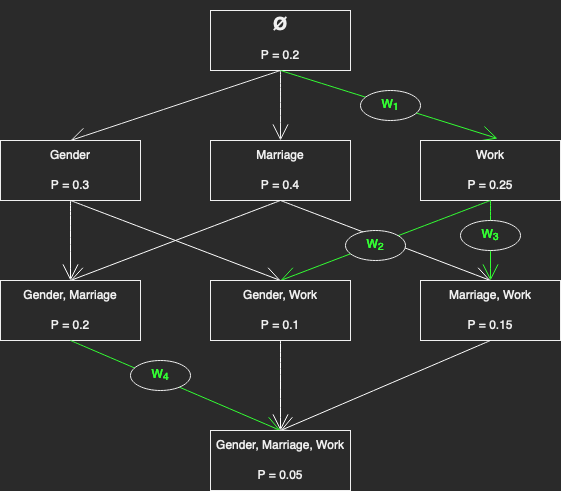

La sortie de l'ensemble vide ($\phi_0)$  correspond au ratio du nombre total de cas appartenant à la classe positive par rapport au nombre total de points de données. Dans cet exemple simple, le nombre de cas positifs est de
0.2.

Maintenant, examinons comment la prédiction du modèle change lorsque nous ajoutons la caractéristique *work* pour un point de données donné
$x$. L'ensemble considéré est l'ensemble vide ($\phi_0)$.


$S_0 = \{\emptyset\}$

$f_{S_0}(x_{S_0}) = 0.2$

$f_{S_0 \bigcup \{work\}}(x_{S_0 \bigcup \{work\}}) = 0.25$

Nous considérons maintenant tous les sous-ensembles de $F$ qui ne contiennent pas la caractéristique *work* ($S \subseteq F \ \{i\}$) et vérifions la différence dans la sortie du modèle lorsque nous prenons en compte le même sous-ensemble, mais en ajoutant la caractéristique *work*.


$S_1 = \{gender\}$

$f_{S_1}(x_{S_1}) = 0.3$

$f_{S_1 \bigcup \{work\}}(x_{S_1 \bigcup \{work\}}) = 0.25$


$S_2 = \{Marriage\}$

$f_{S_2}(x_{S_2}) = 0.4$

$f_{S_2 \bigcup \{work\}}(x_{S_2 \bigcup \{work\}}) = 0.15$

$S_3 = \{Marriage, gender\}$

$f_{S_3}(x_{S_3}) = 0.2$

$f_{S_3 \bigcup \{work\}}(x_{S_3 \bigcup \{work\}}) = 0.05$

Une fois que nous avons trouvé toutes les sorties du modèle pour tous les sous-ensembles différents, nous calculons une moyenne pondérée des sorties du modèle, avec et sans la caractéristique.

Les critères que les poids doivent respecter sont les suivants :
  1. $\sum_{i} w_i = 1$
  2. $w_1 = w_2 + w_3 = w_4$

Comme mentionné précédemment, nous considérons uniquement l'impact de la caractéristique *work* sur le résultat du modèle. Pour obtenir les valeurs de Shap pour les autres caractéristiques, nous répétons la même stratégie.

Appliquons la formule pour obtenir les valeurs de Shap $\phi_i$. Étant donné que nous avons quatre sous-ensembles qui ne contiennent pas la caractéristique *work*, nous allons calculer l'attribution de la caractéristique pour chaque sous-ensemble.


Attribution de la caractéristique pour  $S_0$:

\begin{equation}
\frac{\mid S_0\mid! (\mid F\mid - \mid S_0\mid - 1)!}{\mid F\mid !} [f_{S_0 \bigcup \{i\}}(x_{S_0 \bigcup \{i\}}) - f_{S_0}(x_{S_0})] = \frac{0! (3 - 0 - 1)!}{3!} [0.25-0.2] = \frac{1}{3}0.05
\end{equation}

Nous répétons maintenant le même calcul pour : $S_1$ , $S_2$, et $S_3$

Pour $S_1$: $\frac{1}{6}(-0.05)$

Pour $S_2$: $\frac{1}{6}(-0.25)$

Pour $S_3$: $\frac{1}{3}(-0.15)$

$\phi_i = \frac{1}{3}0.05 + \frac{1}{6}(-0.05) + \frac{1}{6}(-0.25) + \frac{1}{3}(-0.15) = -\frac{1}{6}0.5$

# Prédire si le revenu annuel d'un individu dépasse 50 000 $/an en se basant sur des données de recensement.

In [3]:
import os
print(os.getcwd())  # Affiche le répertoire de travail actuel
print(os.listdir())  # Liste tous les fichiers dans le répertoire courant


/content
['.config', 'adult.data', 'sample_data']


In [ ]:
import shutil

# Supprimer un répertoire avec son contenu
dir_to_remove = "/content/sample_data"
if os.path.exists(dir_to_remove):
    shutil.rmtree(dir_to_remove)
    print(f"Le répertoire {dir_to_remove} et tout son contenu ont été supprimés.")
else:
    print(f"Le répertoire {dir_to_remove} n'existe pas.")


Le répertoire /content/sample_data et tout son contenu ont été supprimés.


In [54]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import model_selection

In [55]:
# Charger le jeu de données
data = load_breast_cancer()

# Créer un DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)


# Ajouter la colonne cible
df['target'] = data.target


# Séparer les features  et la cible
features = df.drop(columns=["target"])
target = df["target"]

<Axes: ylabel='target'>

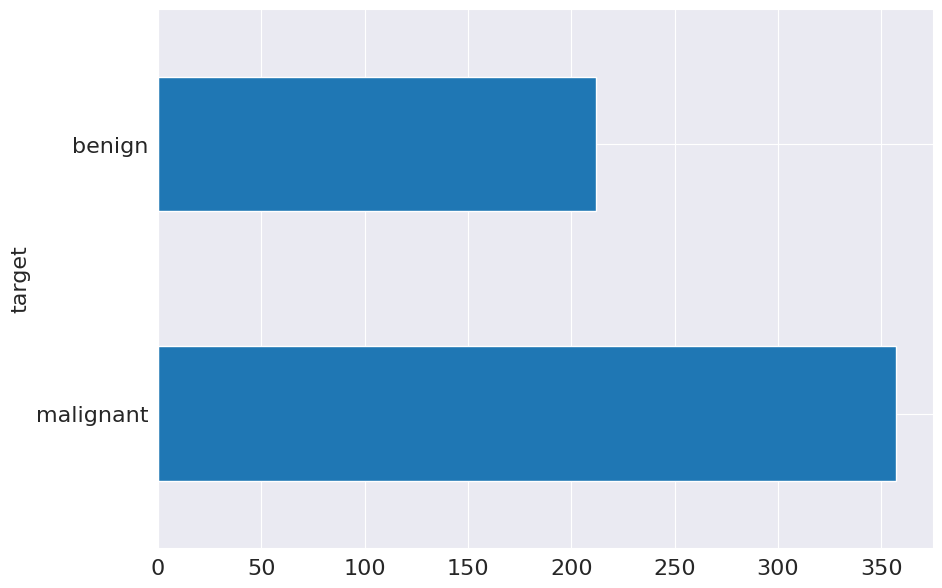

In [56]:
# Configuration de l'affichage
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 7))

# Compter et renommer les classes
counter = target.value_counts()
counter.rename(index={1.0: "malignant", 0.0: "benign"}, inplace=True)
ax.set_xlabel("# Cases", size=7)
counter.plot(kind="barh", ax=ax)

In [57]:
x, y = features, target

In [58]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=80,
                                                                    stratify=target)

In [59]:
# Calculer le poids des classes
proportion_class = counter["benign"] / counter["malignant"]

# Paramètres XGBoost
params_xgb = {
    "n_estimators": 200,
    "max_depth": 8,
    "learning_rate": 0.05,
    "scale_pos_weight": proportion_class,
}


In [60]:
# Modèle XGBoost
xgb = XGBClassifier(**params_xgb)  # Supprimer "use_label_encoder"
xgb.fit(x_train, y_train)

# Évaluation
y_pred = xgb.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


## Use Case: Bipolar Disease Crisis Prediction

Now that we know how to compute Shap values to understand the model, we are going to focus on a critical use case that directly impacts us in our daily economic activity: Bipolar Disease Crisis Prediction.

Bipolar disorder, formerly called manic depression, is a mental health condition that causes extreme mood swings that include emotional highs (mania or hypomania) and lows (depression) which often come accompanied by different features (i.e., physical and psychological features).

In this notebook we will create a Bipolar Disease Crisis Prediciton Model using the data available [here](https://datasets.simula.no/depresjon/) and then apply XAI method SHAP to help psychiatrists to understand the causes behind a potential patient tendency towards a mania or depression episode.


The use case is organized as follows:
1. We load the processed data.
2. We develop a Machine Learning based model for the bipolar disease prediction: the [XGBoost](https://arxiv.org/abs/1603.02754).
3. We apply SHAP Values (https://github.com/slundberg/shap) to explain the ML model outputs


In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.3 MB/s eta 0:00:00


In [ ]:
################## Downdload the git repository ############
! git clone https://github.com/ayoubelqadi/xai-tutorial.git

Cloning into 'xai-tutorial'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 94 (delta 20), reused 86 (delta 18), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 5.80 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
######### Change  directory for running the data processing scripts
import os
os.chdir('xai-tutorial/notebooks')

In [8]:
%run ../src/setup.py
%run ../src/process_data.py

### Setting the Environment

In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 500)      # Affiche jusqu'à 500 lignes
pd.set_option("display.max_columns", 500)  # Affiche jusqu'à 500 colonnes


# pd.set_option("max_rows", 500)
# pd.set_option("max_columns", 500)


import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", size=16)

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import model_selection



In [ ]:
path_features = "../data/features.csv"
path_target = "../data/target.csv"
features = pd.read_csv(path_features)
target = pd.read_csv(path_target)

In [ ]:
#####Transform age and education range
def transform_range(df: pd.DataFrame):

  df["age"] = df["age"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if isinstance(x, str) else x)
  df["edu"] = df["edu"].apply(lambda x: (int(x.split("-")[0]) + int(x.split("-")[1]))/2 if isinstance(x, str) else x)

  return df

In [ ]:
features = transform_range(features)

In [ ]:
features.sample(n=3)

,days,gender,age,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity_mean,activity_std
6,11,1,22.0,NaN,2.0,13.0,2.0,1.0,24.0,25.0,410.053,511.841
7,5,2,27.0,NaN,2.0,13.0,1.0,2.0,20.0,16.0,316.545,503.483
16,13,1,52.0,2.0,2.0,8.0,1.0,2.0,17.0,15.0,147.850,211.517


**Target Distribution**


- Bipolar II: **1**

- Unipolar Depressive: **0**

In [ ]:
!pip install matplotlib


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

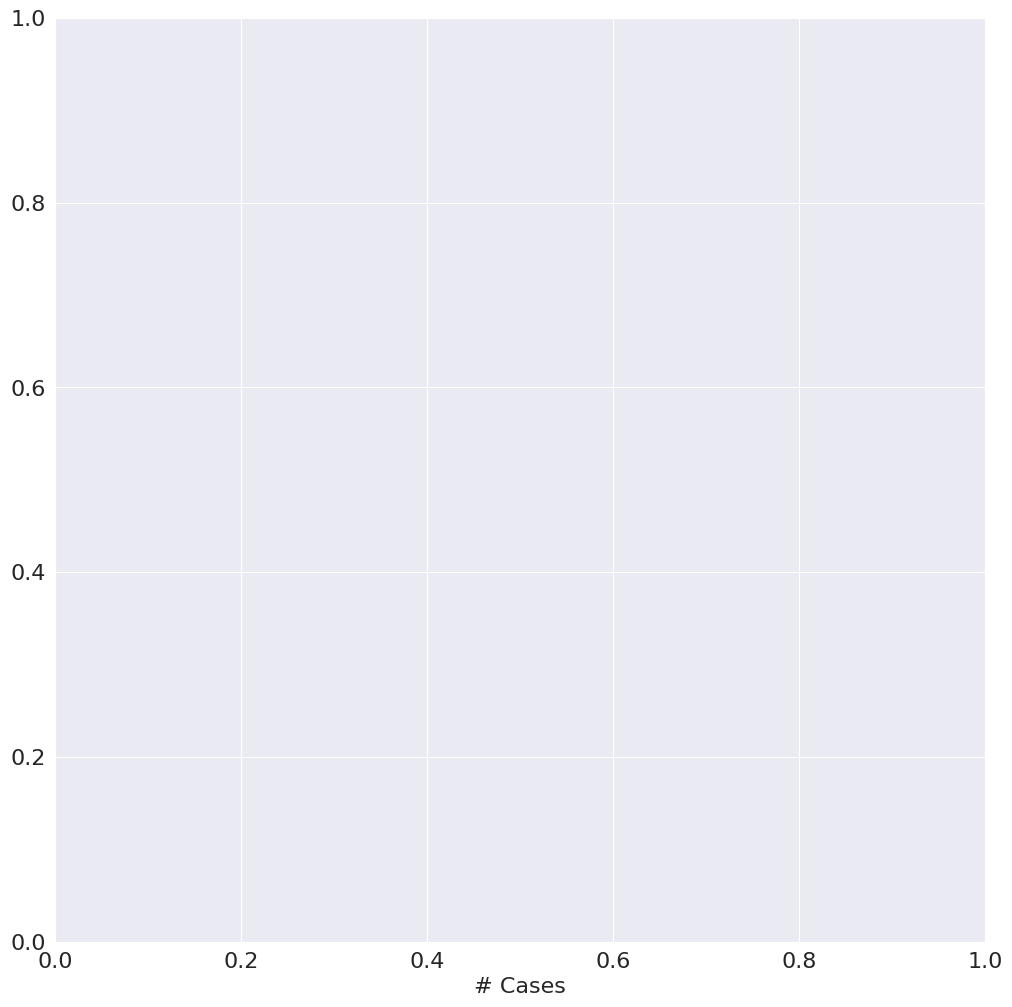

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12,12))
counter = target["afftype"].value_counts()
counter.rename(index={1.0: "Bipolar II",
                       0.0: "Unipolar Depressive"},
               inplace=True
              )
ax.set_xlabel("# Cases", size=16)
counter.plot(kind="barh", ax=ax)


In [ ]:
x, y = features, target

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.3,
                                                                    random_state=80,
                                                                    stratify=target)

In [ ]:
x_train

,days,gender,age,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity_mean,activity_std
7,5,2,27.0,NaN,2.0,13.0,1.0,2.0,20.0,16.0,316.545,503.483
15,16,1,47.0,2.0,2.0,13.0,1.0,2.0,13.0,17.0,338.069,424.913
18,13,1,32.0,1.0,1.0,8.0,1.0,2.0,27.0,25.0,171.471,220.950
8,13,2,47.0,NaN,2.0,8.0,1.0,2.0,26.0,26.0,289.151,348.722
13,14,1,62.0,2.0,2.0,8.0,2.0,2.0,28.0,19.0,205.845,262.523
1,18,2,42.0,2.0,2.0,8.0,2.0,2.0,24.0,11.0,153.673,330.808
16,13,1,52.0,2.0,2.0,8.0,1.0,2.0,17.0,15.0,147.850,211.517
5,7,1,37.0,2.0,2.0,8.0,1.0,2.0,18.0,15.0,361.821,382.775
2,13,1,47.0,2.0,2.0,8.0,2.0,2.0,24.0,25.0,265.300,399.881
10,14,1,47.0,2.0,2.0,8.0,1.0,2.0,24.0,24.0,300.669,369.657


In [ ]:
proportion_class = counter["Unipolar Depressive"]/counter["Bipolar II"]

params_xgb = {
    "n_estimators": 200,
    "max_depth": 8,
    "learning_rate": 0.05,
    "scale_pos_weight": proportion_class
}
xgb = XGBClassifier(**params_xgb, use_label_encoder=True)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Text(0.5, 1.0, 'Confusion Matrix (Train set)')

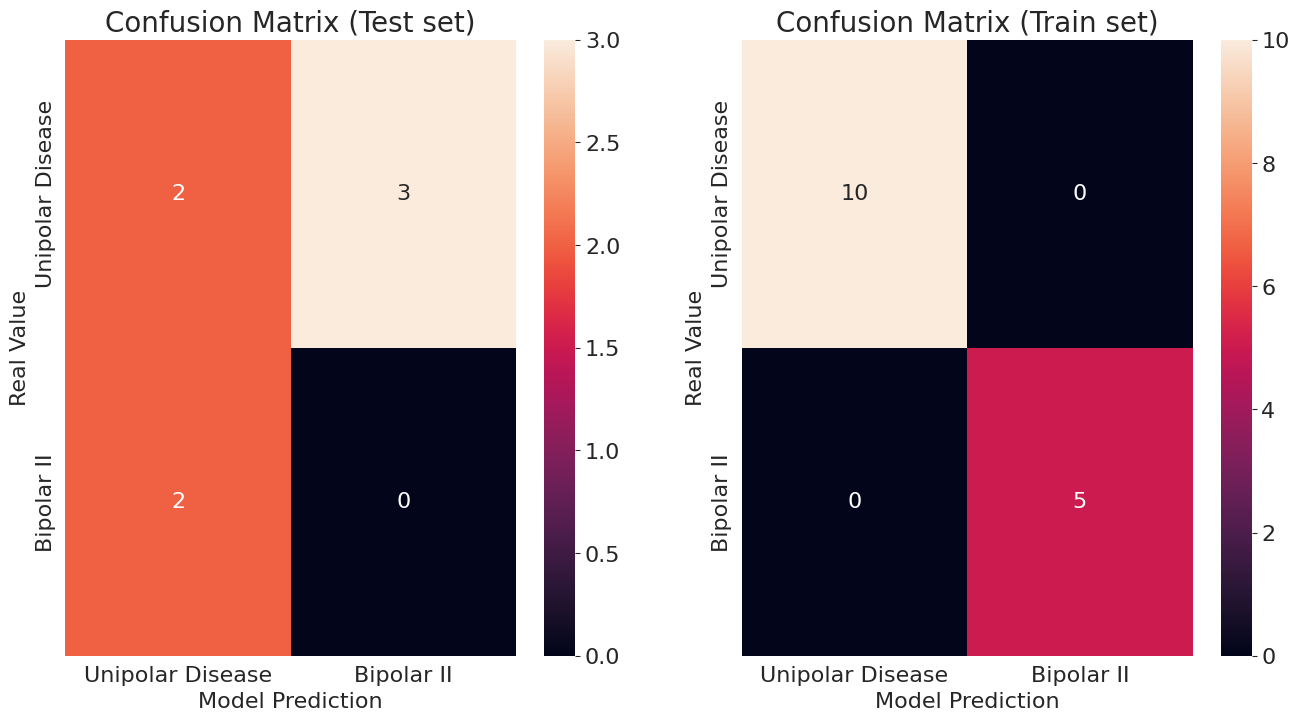

In [ ]:
y_hat = xgb.predict(x_test)
cf = metrics.confusion_matrix(y_pred=y_hat, y_true=y_test)
cf_train = metrics.confusion_matrix(y_pred=xgb.predict(x_train), y_true=y_train)
names_df = [
    "Unipolar Disease",
    "Bipolar II"
]
cf_df = pd.DataFrame(data=cf, columns=names_df, index=names_df)
cf_train_df = pd.DataFrame(data=cf_train, columns=names_df, index=names_df)
fig, ax = plt.subplots(ncols=2, figsize=(16,8))

sns.heatmap(cf_df, fmt="d",annot=True, ax=ax[0])
ax[0].set_xlabel("Model Prediction", size=16)
ax[0].set_ylabel("Real Value", size=16)
ax[0].set_title("Confusion Matrix (Test set)", size=20)

sns.heatmap(cf_train_df, fmt="d",annot=True, ax=ax[1])
ax[1].set_xlabel("Model Prediction", size=16)
ax[1].set_ylabel("Real Value", size=16)
ax[1].set_title("Confusion Matrix (Train set)", size=20)

## SHAP Values

Now we are going to use what we learnt from the SHAP values to understand how our model works. We use the framework developed by Lundberg et al. https://github.com/slundberg/shap

In [ ]:
#Run if shap not installed
! pip install shap

In [ ]:
import shap

**We are going to explain the xgboost model. Since the model developed previously is a tree based we are going to use Tree explainer, a fast implementation to compute Shap values when models are tree based**

In [ ]:
explainer = shap.TreeExplainer(xgb, x, model_output = "raw")
shap_values = explainer.shap_values(x)

**Local interpretability: How do we interpret the SHAP force plot?**


The value we observe in bold is the natural logarithm of the odd ratio $ln(\frac{P(Y=1)}{1-P(Y=1)})$. The base value is the odd ratio if we just consider the number of positive cases over the total of instances. The Shapley values can be understood as forces that push the output of the model. Forces of Shapley values in blue represent the features that increase the probability of default, while red values represent the features that are incrementing the probability of having a bipolar disease.

A force plot allows us to study a concrete case in order to give a reason for diagnosing a potential bipolar disease.

In [ ]:
shap.initjs()
patient_index = 11
shap.force_plot(explainer.expected_value, shap_values[patient_index,:], x.iloc[patient_index,:])

In [ ]:
patient_index = 2

# Patient real target value
diagnosis_map = {1.0: "Bipolar II",
                0.0: "Unipolar Depressive"}
print("-------Patient Real Diagnosis------")

print(y.replace(diagnosis_map).iloc[patient_index].values[0])
print("-------Patient Predicted Diagnosis------")
pred_class = xgb.predict(x.loc[patient_index:patient_index, :])[0]
if pred_class==0.0:
    pred_diagnosis = diagnosis_map[0.0]
    p1 = xgb.predict_proba(x.loc[patient_index:patient_index, :])[0][0]
    p1_round = round(p1,3)
else:
    pred_diagnosis = diagnosis_map[1.0]
    p1 = clf_rf.predict_proba(x.loc[patient_index:patient_index, :])[0][1]
    p1_round = round(p1,3)
print(f'Probability of being diagnosed with a {pred_diagnosis} \n{p1_round}')


-------Patient Real Diagnosis------
Unipolar Depressive
-------Patient Predicted Diagnosis------
Probability of being diagnosed with a Unipolar Depressive 
0.9350000023841858


**Global interpretability: SHAP Summary plot.**

The SHAP summary plot allows us to understand the model by ranking the features from the most relevant to the least important ones. Each datapoint represents a different person. In this concrete use case, the most relevant feature are: the variation of the activity mesasurements obtained of the actigraph watch, the Montgomery Asberg Depression Rating Scale at the moment the actigraph was stopped. High values of these features impact negatively in the output of the model (the probability of having a bipolar disease increases).

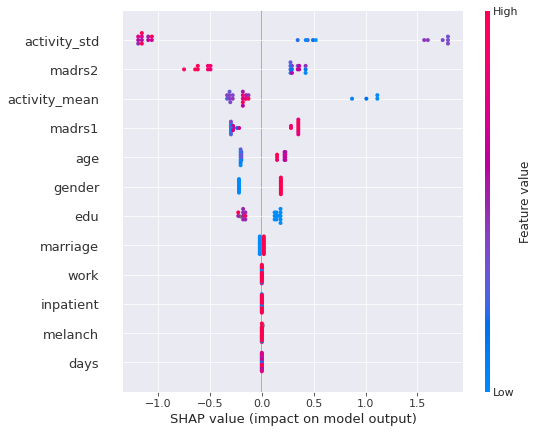

In [ ]:
shap.summary_plot(shap_values, x, show=False)

plt.savefig("shap_summary_plot.png", bbox_inches="tight")